In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

## **import the data **

In [2]:
import pandas as pd
doc=pd.read_csv("/kaggle/input/hospital-management-dataset/doctors.csv")
patient=pd.read_csv("/kaggle/input/hospital-management-dataset/patients.csv")
treatment=pd.read_csv("/kaggle/input/hospital-management-dataset/treatments.csv")
appointment=pd.read_csv("/kaggle/input/hospital-management-dataset/appointments.csv")
billing=pd.read_csv("/kaggle/input/hospital-management-dataset/billing.csv")

understand the data

In [3]:
print(f"shape of doc {doc.shape} \n",doc.head(2))
print(f"shape of patient {patient.shape} \n",patient.head(2))
print(f"shape of treatment {treatment.shape} \n",treatment.head(2))
print(f"shape of appointment {appointment.shape} \n",appointment.head(2))
print(f"shape of bill {billing.shape} \n",billing.head(2))


shape of doc (10, 8) 
   doctor_id first_name last_name specialization  phone_number  \
0      D001      David    Taylor    Dermatology    8322010158   
1      D002       Jane     Davis     Pediatrics    9004382050   

   years_experience  hospital_branch                         email  
0                17  Westside Clinic  dr.david.taylor@hospital.com  
1                24  Eastside Clinic    dr.jane.davis@hospital.com  
shape of patient (50, 11) 
   patient_id first_name last_name gender date_of_birth  contact_number  \
0       P001      David  Williams      F    1955-06-04      6939585183   
1       P002      Emily     Smith      F    1984-10-12      8228188767   

        address registration_date insurance_provider insurance_number  \
0   789 Pine Rd        2022-06-23       WellnessCorp        INS840674   
1  321 Maple Dr        2022-01-15        PulseSecure        INS354079   

                     email  
0  david.williams@mail.com  
1     emily.smith@mail.com  
shape of treatme

# procees the data 

process the data extract the required and insights column from data


explore the data one by one it does not have missing value 

In [4]:
print("patient \n",patient.isnull().sum(),"\n ------------")
print("doctor \n",doc.isnull().sum(),"\n ------------")
print("treatment \n",treatment.isnull().sum(),"\n ------------")
print("appointment \n",appointment.isnull().sum(),"\n ------------")
print("billing \n",billing.isnull().sum(),"\n ------------")

patient 
 patient_id            0
first_name            0
last_name             0
gender                0
date_of_birth         0
contact_number        0
address               0
registration_date     0
insurance_provider    0
insurance_number      0
email                 0
dtype: int64 
 ------------
doctor 
 doctor_id           0
first_name          0
last_name           0
specialization      0
phone_number        0
years_experience    0
hospital_branch     0
email               0
dtype: int64 
 ------------
treatment 
 treatment_id      0
appointment_id    0
treatment_type    0
description       0
cost              0
treatment_date    0
dtype: int64 
 ------------
appointment 
 appointment_id      0
patient_id          0
doctor_id           0
appointment_date    0
appointment_time    0
reason_for_visit    0
status              0
dtype: int64 
 ------------
billing 
 bill_id           0
patient_id        0
treatment_id      0
bill_date         0
amount            0
payment_method    0

In [5]:
from  datetime import date,datetime
def age(da):
    date_obj = pd.to_datetime(da)
    today=date.today()
    return  today.year-date_obj.year 
    
patient['age']=patient['date_of_birth'].apply(age)

In [7]:
pat=pd.DataFrame()
li=["patient_id","gender",'age']
for i in li:
    pat[i]=patient[i]

In [21]:
doct=pd.DataFrame()
li=["doctor_id","years_experience",'hospital_branch','specialization']
for i in li:
    doct[i]=doc[i]

### **we going to perform inner join the treatment  appointment, based on appointment id we transform these data into single datasheet **

In [22]:
appoint=pd.merge(appointment,treatment,on="appointment_id",how="inner")
appoint=pd.merge(appoint,pat,on="patient_id",how="inner")
appoint=pd.merge(appoint,doct,on="doctor_id",how="inner")
appoint=pd.merge(appoint,billing,on="treatment_id",how="inner")


In [23]:
appoint.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   appointment_id    200 non-null    object 
 1   patient_id_x      200 non-null    object 
 2   doctor_id         200 non-null    object 
 3   appointment_date  200 non-null    object 
 4   appointment_time  200 non-null    object 
 5   reason_for_visit  200 non-null    object 
 6   status            200 non-null    object 
 7   treatment_id      200 non-null    object 
 8   treatment_type    200 non-null    object 
 9   description       200 non-null    object 
 10  cost              200 non-null    float64
 11  treatment_date    200 non-null    object 
 12  gender            200 non-null    object 
 13  age               200 non-null    int64  
 14  years_experience  200 non-null    int64  
 15  hospital_branch   200 non-null    object 
 16  specialization    200 non-null    object 
 1

### *now its time for EDA* 

In [53]:
print(pd.crosstab(appoint['doctor_id'],appoint['treatment_type'],margins=True ,normalize="index"))

treatment_type  Chemotherapy       ECG       MRI  Physiotherapy     X-Ray
doctor_id                                                                
D001                0.280000  0.200000  0.160000       0.160000  0.200000
D002                0.285714  0.095238  0.142857       0.333333  0.142857
D003                0.318182  0.227273  0.181818       0.045455  0.227273
D004                0.214286  0.071429  0.357143       0.142857  0.214286
D005                0.206897  0.172414  0.103448       0.206897  0.310345
D006                0.250000  0.250000  0.166667       0.166667  0.166667
D007                0.153846  0.230769  0.307692       0.153846  0.153846
D008                0.250000  0.187500  0.062500       0.312500  0.187500
D009                0.294118  0.117647  0.235294       0.058824  0.294118
D010                0.157895  0.315789  0.210526       0.210526  0.105263
All                 0.245000  0.190000  0.180000       0.180000  0.205000


In [26]:
print(pd.crosstab(appoint['reason_for_visit'],appoint['treatment_type'],margins=True ,normalize="index"))

treatment_type    Chemotherapy       ECG       MRI  Physiotherapy     X-Ray
reason_for_visit                                                           
Checkup               0.177778  0.222222  0.133333       0.222222  0.244444
Consultation          0.255814  0.139535  0.139535       0.255814  0.209302
Emergency             0.275862  0.206897  0.241379       0.103448  0.172414
Follow-up             0.341463  0.121951  0.219512       0.170732  0.146341
Therapy               0.190476  0.261905  0.190476       0.119048  0.238095
All                   0.245000  0.190000  0.180000       0.180000  0.205000


**it say the conditionl proability about p(column/index) below is p(index/column)**

In [27]:
print(pd.crosstab(appoint['reason_for_visit'],appoint['treatment_type'],margins=True ,normalize="columns"))

treatment_type    Chemotherapy       ECG       MRI  Physiotherapy     X-Ray  \
reason_for_visit                                                              
Checkup               0.163265  0.263158  0.166667       0.277778  0.268293   
Consultation          0.224490  0.157895  0.166667       0.305556  0.219512   
Emergency             0.163265  0.157895  0.194444       0.083333  0.121951   
Follow-up             0.285714  0.131579  0.250000       0.194444  0.146341   
Therapy               0.163265  0.289474  0.222222       0.138889  0.243902   

treatment_type      All  
reason_for_visit         
Checkup           0.225  
Consultation      0.215  
Emergency         0.145  
Follow-up         0.205  
Therapy           0.210  


In [29]:
print(pd.crosstab(appoint['treatment_type'],appoint['specialization'],margins=True ,normalize="columns"))

specialization  Dermatology  Oncology  Pediatrics    All
treatment_type                                          
Chemotherapy       0.242857   0.15625    0.275510  0.245
ECG                0.185714   0.28125    0.163265  0.190
MRI                0.114286   0.25000    0.204082  0.180
Physiotherapy      0.214286   0.18750    0.153061  0.180
X-Ray              0.242857   0.12500    0.204082  0.205


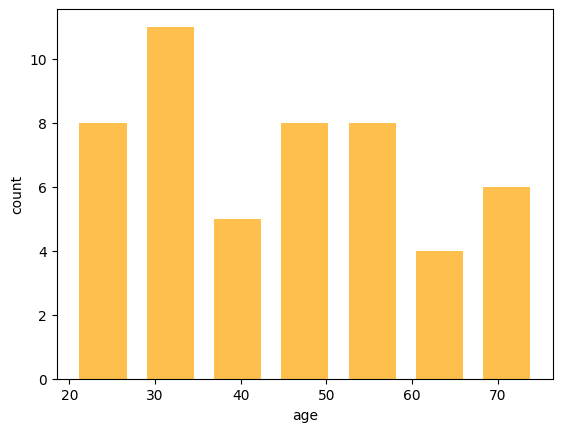

In [36]:
import matplotlib.pyplot as plt
plt.hist(pat['age'],bins=7,rwidth=0.7,color='orange',alpha=0.7,label='count')
plt.xlabel('age')
plt.ylabel("count")
plt.show()

In [44]:
import seaborn as sns
pat['gender'].value_counts()

gender
M    31
F    19
Name: count, dtype: int64

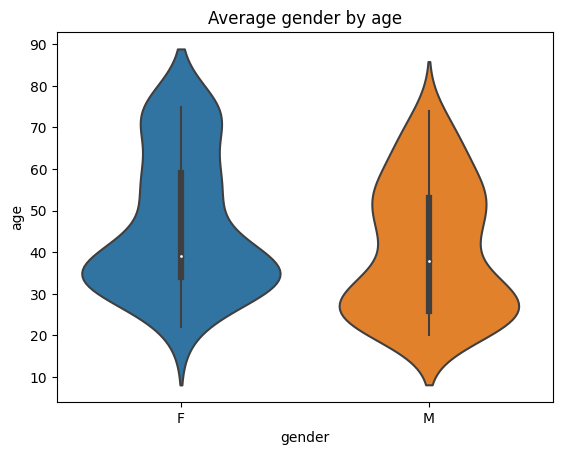

In [48]:
sns.violinplot(x='gender', y='age', data=appoint, estimator='mean')
plt.title('Average gender by age')
plt.show()


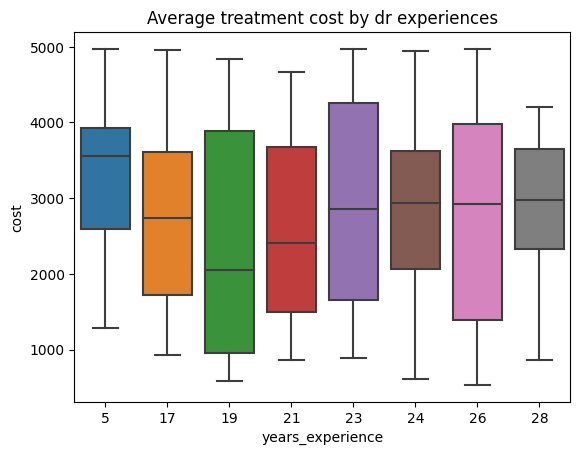

In [52]:
sns.boxplot(x='years_experience', y='cost', data=appoint)
plt.title('Average treatment cost by dr experiences')
plt.show()


In [62]:
appoint['appointment_date'] = pd.to_datetime(appoint['appointment_date'])

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


In [65]:
appoint[appoint['patient_id_x'] == 'P007'].sort_values(by='appointment_date')


,appointment_id,patient_id_x,doctor_id,appointment_date,appointment_time,reason_for_visit,status,treatment_id,treatment_type,description,...,age,years_experience,hospital_branch,specialization,bill_id,patient_id_y,bill_date,amount,payment_method,payment_status
179,A180,P007,D008,2023-01-07,11:00:00,Consultation,Cancelled,T180,Chemotherapy,Advanced protocol,...,36,5,Westside Clinic,Dermatology,B180,P007,2023-01-07,3228.14,Credit Card,Paid
94,A095,P007,D009,2023-05-09,10:15:00,Therapy,Cancelled,T095,X-Ray,Advanced protocol,...,36,26,Central Hospital,Pediatrics,B095,P007,2023-05-09,2097.48,Cash,Failed
144,A145,P007,D002,2023-11-11,14:45:00,Checkup,Scheduled,T145,X-Ray,Advanced protocol,...,36,24,Eastside Clinic,Pediatrics,B145,P007,2023-11-11,2120.61,Insurance,Paid
199,A200,P007,D005,2023-12-30,10:15:00,Consultation,Cancelled,T200,X-Ray,Basic screening,...,36,26,Central Hospital,Dermatology,B200,P007,2023-12-30,3288.15,Insurance,Paid


In [67]:
appoint["treatment_type"].value_counts()



treatment_type
Chemotherapy     49
X-Ray            41
ECG              38
MRI              36
Physiotherapy    36
Name: count, dtype: int64

In [70]:
print(pd.crosstab(appoint['treatment_type'],appoint['years_experience'],margins=True ))

years_experience   5  17  19  21  23  24  26  28  All
treatment_type                                       
Chemotherapy       4   7   7   3   6   6  13   3   49
ECG                3   5   5   6   6   2  10   1   38
MRI                1   4   4   4   4   3  11   5   36
Physiotherapy      5   4   1   4   4   7   9   2   36
X-Ray              3   5   5   2   4   3  16   3   41
All               16  25  22  19  24  21  59  14  200


## insights which are gain from the data which is listed bellow  
* some  doctor sugest majority as chemotherapy which mean he consult most oncology patient but he is Dermatology,Pediatrics
  it mismatch completely cancer patients are treated by  Dermatology,Pediatrics but oncology  specialist does not  suggest chemotheraphy,they suggest mri and ecg 
* when i followed the history of random patient 001 70 year old  ,he is cancer patient ,he consulted different doctor , on each time four times ,2 doctors are oncology doctor,patients are not maintained by single doctor
* doctor suggest chemotherapy for 30% of follow up patient .
* hospital most of the patient is male
* most of the patient in the age of 20-35
* most of the patient are taking chemothreaphy
* less experience doctors give more expensive treatment
* most of patient consult by high experience data

